In [1]:
#Import Library
import json
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt 
import spacy 
import math
import scipy
import seaborn as sns
import networkx as nx
import collections

In [2]:
#user = pd.read_json("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/user.json", lines = True)



In [4]:
#user_list = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_list.pkl")

In [7]:
#user_list.columns = ['user_id']
#user_rester = user_list.merge(user,on='user_id',how = 'left')


In [9]:
#user_rester['friend_count'] = user_rester['friends'].apply(lambda x: len(x.split()))

In [2]:
user = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_rester.pkl")

In [3]:
user.dropna()
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148098 entries, 0 to 1148097
Data columns (total 23 columns):
user_id               1148098 non-null object
average_stars         1148098 non-null float64
compliment_cool       1148098 non-null int64
compliment_cute       1148098 non-null int64
compliment_funny      1148098 non-null int64
compliment_hot        1148098 non-null int64
compliment_list       1148098 non-null int64
compliment_more       1148098 non-null int64
compliment_note       1148098 non-null int64
compliment_photos     1148098 non-null int64
compliment_plain      1148098 non-null int64
compliment_profile    1148098 non-null int64
compliment_writer     1148098 non-null int64
cool                  1148098 non-null int64
elite                 1148098 non-null object
fans                  1148098 non-null int64
friends               1148098 non-null object
funny                 1148098 non-null int64
name                  1148098 non-null object
review_count          1148

In [4]:
user['yelping_since_date'] = user['yelping_since'].apply(lambda x: str(x).split()[0])

In [8]:
user['yelping_since_date'] = pd.to_datetime(user['yelping_since_date'])

Text(0.5, 1.0, 'total user increase trend')

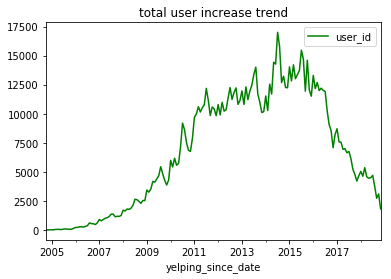

In [18]:
#check user increase trend
user_increase = user.set_index('yelping_since_date').groupby(pd.Grouper(freq = 'M')).count().loc[:,['user_id']]
user_increase.reset_index(level=0, inplace=True)
user_increase
user_increase.plot(kind='line',x='yelping_since_date',y='user_id',color='green')
plt.title('total user increase trend')

#extract relavent users 

In [10]:
target_business_id_list = pd.DataFrame(target_business_id['business_id'])
target_review = review.merge(target_business_id_list, on = 'business_id', how = 'inner')

NameError: name 'review' is not defined

In [11]:
target_user = target_review.loc[:,'user_id'].unique()
target_user = pd.DataFrame(target_user)

NameError: name 'target_review' is not defined

In [9]:
print(target_user.info())
print(user.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190828 entries, 0 to 190827
Data columns (total 1 columns):
0    190828 non-null object
dtypes: object(1)
memory usage: 1.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 252465 entries, 0 to 252464
Data columns (total 24 columns):
user_id               252464 non-null object
average_stars         252464 non-null float64
compliment_cool       252464 non-null float64
compliment_cute       252464 non-null float64
compliment_funny      252464 non-null float64
compliment_hot        252464 non-null float64
compliment_list       252464 non-null float64
compliment_more       252464 non-null float64
compliment_note       252464 non-null float64
compliment_photos     252464 non-null float64
compliment_plain      252464 non-null float64
compliment_profile    252464 non-null float64
compliment_writer     252464 non-null float64
cool                  252464 non-null float64
elite                 252464 non-null object
fans              

In [10]:
target_user.columns = ['user_id']
target_user_info = user.merge(target_user, on = 'user_id', how = 'inner')

In [11]:
target_user_info['yelping_since_date'] = target_user_info['yelping_since'].apply(lambda x: str(x).split()[0])
target_user_info['yelping_since_date'] = pd.to_datetime(target_user_info['yelping_since_date'])

Text(0.5, 1.0, 'total target user increase trend')

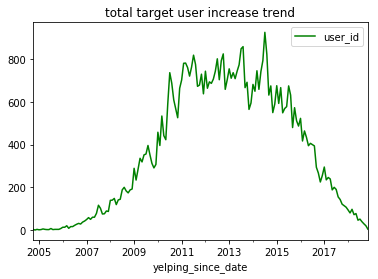

In [12]:
#check taret user increase trend

target_user_increase = target_user_info.set_index('yelping_since_date').groupby(pd.Grouper(freq = 'M')).count().loc[:,['user_id']]
target_user_increase.reset_index(level=0, inplace=True)
target_user_increase
target_user_increase.plot(kind='line',x='yelping_since_date',y='user_id',color='green')
plt.title('total target user increase trend')

#User Feature Engineering
#Intersted in potential demographic info

#Elite year count
#fans 
#Review count
#friend count
#yelp year count 
#resteraunt friends count 

#degree
#Eigenevector Centrality

In [5]:
#Elite Year Count
user['elite_year_count'] = user['elite'].apply(lambda x: len(str(x).split(',')))

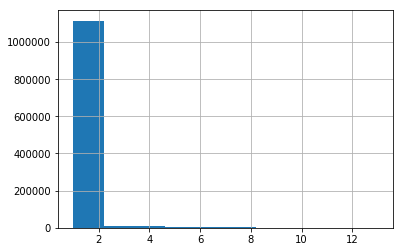

In [6]:
user['elite_year_count'].hist()
plt.show()

In [9]:
#Yelp Year Count
print(user['yelping_since_date'].describe())

from datetime import datetime
end_time = datetime.strptime('2018-12-31','%Y-%m-%d')
user['yelp_year_count'] = user['yelping_since_date'].apply(lambda x: str((end_time - x)/365).split()[0])

count                 1148098
unique                   5025
top       2015-10-17 00:00:00
freq                      704
first     2004-10-12 00:00:00
last      2018-11-14 00:00:00
Name: yelping_since_date, dtype: object


In [10]:
user = user[user['yelp_year_count'] != 'NaT']
user['yelp_year_count'] = user['yelp_year_count'].apply(lambda x: float(x))

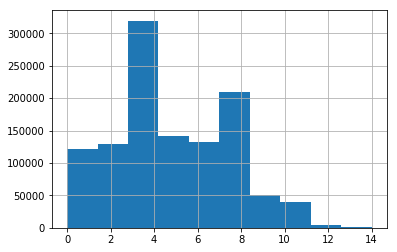

In [23]:
user['yelp_year_count'].hist()

#Centrality 

In [25]:
# create adjancent text file from user.json; info is stored as str
def adjacent(user):
    user = user[user['friend_count']>0]
    file = open("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/adjacent.txt", "w") 
    friends = collections.defaultdict(str)
    for i in user.index:
        friends['user_id'] = user.loc[i,'user_id']
        friends['friends'] = user.loc[i,'friends'].split(', ')
        file.write(json.dumps(friends))
        file.write('\n')

In [26]:
adjacent(user)

In [27]:
def edges(user):
    file = open("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/edges.txt", "w")
    with open("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/adjacent.txt", 'r') as f:
        for line in f:
            data = json.loads(line)
            u = data['user_id']
            friends = data['friends']
            for v in friends:
                file.write(u +' ' +v)
                file.write('\n')

In [28]:
edges(user)

In [29]:
# create a graph from 'adjacent.txt' file
def graph():
    G = nx.Graph()
    with open("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/adjacent.txt", 'r') as f:
        for line in f:
            data = json.loads(line)
            u = data['user_id']
            friends = data['friends']
            for v in friends:
                G.add_edge(u,v)
    return G

In [ ]:
graph = graph()

In [28]:
df_node_degree = pd.DataFrame(list(dict(graph.degree()).items()), columns=["node_name", "degree"])

In [29]:
df_node_eigenvector_centrality = pd.DataFrame(list(nx.eigenvector_centrality(graph).items()), columns=["node_name", "eigenvector_centrality"])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-a25651b02eb7>", line 1, in <module>
    df_node_eigenvector_centrality = pd.DataFrame(list(nx.eigenvector_centrality(graph).items()), columns=["node_name", "eigenvector_centrality"])
  File "<C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\decorator.py:decorator-gen-264>", line 2, in eigenvector_centrality
  File "C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\utils\decorators.py", line 82, in _not_implemented_for
    return not_implement_for_func(*args, **kwargs)
  File "C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\algorithms\centrality\eigenvector.py", line 129, in eigenvector_centrality
    x = {k: v / sum(nstart.values()) for k, v in nstart.items()}
  File "C:\

KeyboardInterrupt: 

In [ ]:
user_centrality = pd.concat([df_node_closeness_centrality.set_index('node_name'),
               df_node_eigenvector_centrality.set_index('node_name'),axis=1)

#Data Export

In [ ]:
user.to_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_v1.pkl") 
#user_rester.to_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_rester.pkl") 